In [1]:
import sys
sys.path.append('..')

In [2]:
import torch

if torch.cuda.is_available():
    device = 'cuda'
if torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'

## Load data

In [4]:
from src.dataset.static2dynamic import Pedar_Dataset_static2dynamic

pedar = Pedar_Dataset_static2dynamic(
    device=device,
    pedar_static_path='../data/processed/pedar_static.pkl',
    pedar_dynamic_path='../data/processed/pedar_dynamic.pkl',
)

## Extract common contact area

### Filtered counts approach

In [23]:
# count = (pedar.pedar_static > 20).sum()
# count

In [24]:
# from src.tool import visual

# visual.draw_heatmap(count, '../data/processed/left_foot_mask.png', vmax=count.max())

In [25]:
# visual.draw_heatmap((count >= 100) * 1.0, '../data/processed/left_foot_mask.png', vmax=1, cmap='cool')

In [26]:
# import numpy as np

# sensors = np.where(count >= 100)[0]
# sensors

### Filter mean approach

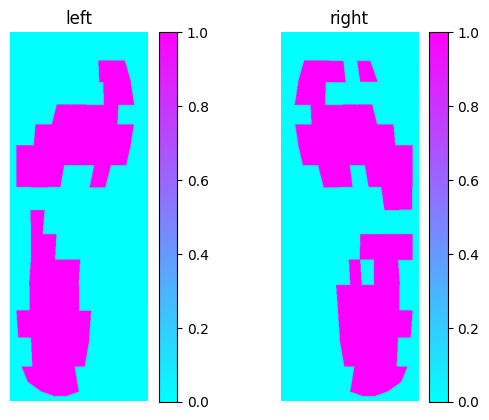

In [13]:
from src.tool import visual

threads_hold = 20
mean = pedar.pedar_static.mean()

visual.draw_heatmap((mean > threads_hold) * 1.0, '../data/processed/left_foot_mask.png', vmax=1, cmap='cool')

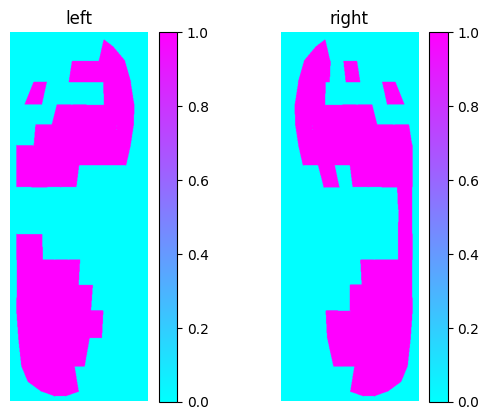

In [14]:
threads_hold = 45
mean = pedar.pedar_dynamic.mean()

visual.draw_heatmap((mean > threads_hold) * 1.0, '../data/processed/left_foot_mask.png', vmax=1, cmap='cool')

In [15]:
sensors = np.where(mean > threads_hold)[0]
sensors

array([  1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  20,  21,  22,  23,  24,  25,  28,  29,  30,
        31,  32,  38,  39,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  75,  76,  77,  78,  79,
        82,  83,  88,  89,  90,  91,  92,  95, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       120, 121, 122, 123, 124, 128, 129, 130, 131, 138, 145, 152, 154,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 181, 182, 187,
       188, 189, 191, 194])

## Export common contact points

In [18]:
pedar.load_foot_mask('../data/processed/left_foot_mask.png')

In [20]:
l_contact = []
r_contact = []

for sensor in sensors:
    if sensor <= 99:
        l_contact.append(np.array(pedar.l_index[sensor]).T)
    else:
        r_contact.append(np.array(pedar.r_index[sensor]).T)

In [21]:
points_l_contact = np.concatenate(l_contact)
points_r_contact = np.concatenate(r_contact)
points_l_contact.shape, points_r_contact.shape

((94455, 2), (96804, 2))

In [22]:
np.save('../data/processed/points_l_contact.npy', points_l_contact)
np.save('../data/processed/points_r_contact.npy', points_r_contact)